In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# integer number of layers
n_layers = 10

# layer height,specific to printer [mm]
layer_height = 0.018

xres = 299.73  # DPI
yres = 299.73  # DPI

Text(0, 0.5, 'y [mm]')

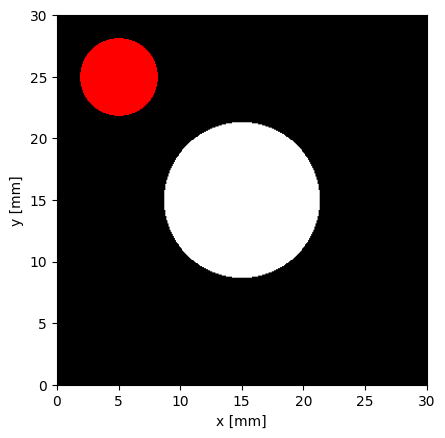

In [ ]:
bounds = np.array([30, 30]) # mm

# Don't touch
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mapx = lambda x: xres * 0.0393701 * x
mapy = lambda y: yres * 0.0393701 * y
x_samp = np.linspace(0, bounds[0], int(np.ceil(mapx(bounds[0]))))
y_samp = np.linspace(0, bounds[1], int(np.ceil(mapy(bounds[1]))))
x, y = np.meshgrid(x_samp, y_samp)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


out = np.zeros(list(x.shape) + [3], dtype=np.int32)

# Define a set of passes; each with their own identifying color and locating function (a function of x and y which returns true (deposit material) or false)
passes = [
    {
        "color": [255, 255, 255],
        "where": (x-15)**2 + (y-15)**2 < 40,
    },
        {
        "color": [255, 0, 0],
        "where": (x-5)**2 + (y-5)**2 < 10
    }
]


for i in range(n_layers):

    # current z coordinate corresponding to layer
    z = i * layer_height
    out = np.zeros(list(x.shape) + [3], dtype=np.uint8)

    for material in passes:
        out[material["where"], :] = material["color"]
    
    im = Image.fromarray(out)
    im.save(f"outputs/slice_{i+1:03d}.png")

plt.imshow(out, extent=[0, bounds[0], 0, bounds[1]])
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")